<a href="https://colab.research.google.com/github/sayame3/123/blob/main/newrecipes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load data
data = pd.read_csv('/content/newrecipes.csv')

# Display data structure
data_info = pd.DataFrame({
    'Total Rows': [data.shape[0]],
    'Total Columns': [data.shape[1]]
})
display(data_info)

# Display first few rows
display(data.head())

# Display column names
column_df = pd.DataFrame({'Column Names': data.columns})
display(column_df)

# Display missing values
missing_values = pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])
display(missing_values)

,Total Rows,Total Columns
0,100000,8


,Page path and screen class,Views,Active users,Views per active user,Average engagement time per active user,Event count,Key events,Total revenue
0,/yeokens/dairy-go-round,2094714,246297,8.504830,97.393768,3505284,0,0
1,/yeokens/hub,1098534,263191,4.173904,90.292480,1330491,0,0
2,/yeokens/get-banking,1057991,276233,3.830067,40.747651,1357745,0,0
3,/yeokens/sign-in,788235,332909,2.367719,24.573118,2014184,0,0
4,/yeokens/spend,434384,155378,2.795660,68.716157,509021,0,0


,Column Names
0,Page path and screen class
1,Views
2,Active users
3,Views per active user
4,Average engagement time per active user
5,Event count
6,Key events
7,Total revenue


,Missing Values
Page path and screen class,0
Views,0
Active users,0
Views per active user,0
Average engagement time per active user,0
Event count,0
Key events,0
Total revenue,0


** Categorize the Pages**

In [3]:
# Categorize the Pages based on URL structure

def categorize_page(url):
    url = url.lower()
    if 'quick-easy' in url:
        return 'Quick & Easy'
    elif 'desserts-baking' in url:
        return 'Desserts & Baking'
    elif 'family-meals' in url:
        return 'Family Meals'
    elif 'on-the-side' in url:
        return 'On the Side'
    elif 'recipes' in url:
        return 'General Recipes'
    else:
        return 'Other'

# Apply the function to create a new column
data['Content Group'] = data['Page path and screen class'].apply(categorize_page)

# Step 2: Check how many pages fell under each category
category_counts = data['Content Group'].value_counts().reset_index()
category_counts.columns = ['Content Group', 'Page Count']
display(category_counts)

# Step 3 (Optional): Preview categorized data
display(data[['Page path and screen class', 'Content Group']].head(20))


,Content Group,Page Count
0,Other,99545
1,General Recipes,455


,Page path and screen class,Content Group
0,/yeokens/dairy-go-round,Other
1,/yeokens/hub,Other
2,/yeokens/get-banking,Other
3,/yeokens/sign-in,Other
4,/yeokens/spend,Other
5,/,Other
6,/yeokens/type-a-code,Other
7,/yeokens/raffle,Other
8,/yeokens/play,Other
9,/yeokens/scan-a-code,Other


# **Recipes Analysis**

In [4]:
# Filter for only 'General Recipes'
recipes_data = data[data['Content Group'] == 'General Recipes']

# Display the filtered data
print("Filtered Data for General Recipes:")
display(recipes_data)


Filtered Data for General Recipes:


,Page path and screen class,Views,Active users,Views per active user,Average engagement time per active user,Event count,Key events,Total revenue,Content Group
20,/recipes,38484,10373,3.710016,86.347826,44886,0,0,General Recipes
29,/recipes/courgette-chocolate-chip-cookies-with...,10171,6824,1.490475,14.764801,25843,0,0,General Recipes
31,/recipes/gingerbread-granola,9083,5376,1.689546,13.579799,21444,0,0,General Recipes
38,/recipes/naan-flatbread,6754,4777,1.413858,16.873561,17242,0,0,General Recipes
42,/recipes/kefir-marinated-chicken-cashew-nut-curry,4885,3360,1.453869,15.889583,13098,0,0,General Recipes
...,...,...,...,...,...,...,...,...,...
10387,/recipes/squash-and-chicken-cheese-toastie,1,0,0.000000,0.000000,2,0,0,General Recipes
10388,/recipes/strawberry-scones,1,1,1.000000,6.000000,2,0,0,General Recipes
10389,/recipes/turkish-eggs-breakfast-bean-burger,1,0,0.000000,0.000000,2,0,0,General Recipes
10390,/recipes/welsh-cakes,1,1,1.000000,4.000000,2,0,0,General Recipes


In [27]:
# Step 1: Rank by Active Users across all recipe pages (no category grouping)
top_10_overall = recipes_data.groupby('Page path and screen class').agg({
    'Active users': 'sum',
    'Average engagement time per active user': 'mean'
}).reset_index()

# Step 2: Sort by Active Users DESC to get top 10
top_10_overall = top_10_overall.sort_values(by='Active users', ascending=False).head(10)

# Step 3: Display the top 10 table
print("Top 10 Recipe Pages by Active Users (Overall):")
display(top_10_overall)


Top 10 Recipe Pages by Active Users (Overall):


,Page path and screen class,Active users,Average engagement time per active user
5,/recipes,10373,86.347826
116,/recipes/courgette-chocolate-chip-cookies-with...,6824,14.764801
153,/recipes/gingerbread-granola,5376,13.579799
240,/recipes/naan-flatbread,4777,16.873561
193,/recipes/kefir-marinated-chicken-cashew-nut-curry,3360,15.889583
82,/recipes/cherry-and-almond-festive-trifle,2471,11.449211
167,/recipes/greek-yogurt-lasagne,1993,37.592072
3,/blog/veggie-recipes-this-autumn,1752,33.515982
202,/recipes/lemon-and-blueberry-and-chilli-cheese...,1664,40.228966
69,/recipes/chard-rolls-with-roasted-fresh-tomato...,1557,25.057161


In [6]:
# categorization logic with URL pattern recognition
def categorize_recipe(url):
    url = url.lower()

    # Desserts & Baking examples
    if "cookie" in url or "cake" in url or "muffin" in url or "dessert" in url or "scone" in url or "bake" in url:
        return "Desserts & Baking"

    # Quick & Easy (assuming based on common recipe names)
    elif "flatbread" in url or "quick" in url or "easy" in url or "wrap" in url:
        return "Quick & Easy"

    # Family Meals
    elif "curry" in url or "family" in url or "main" in url or "meal" in url or "dinner" in url:
        return "Family Meals"

    # On the Side
    elif "side" in url or "snack" in url or "dip" in url or "salad" in url:
        return "On the Side"

    else:
        return "Other"

# Apply categorization with .loc to avoid warning
recipes_data.loc[:, 'Recipe Category'] = recipes_data['Page path and screen class'].apply(categorize_recipe)

# View the categorized data
display(recipes_data[['Page path and screen class', 'Recipe Category']])



<ipython-input-6-2fba1d2fe041>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_data.loc[:, 'Recipe Category'] = recipes_data['Page path and screen class'].apply(categorize_recipe)


,Page path and screen class,Recipe Category
20,/recipes,Other
29,/recipes/courgette-chocolate-chip-cookies-with...,Desserts & Baking
31,/recipes/gingerbread-granola,Other
38,/recipes/naan-flatbread,Quick & Easy
42,/recipes/kefir-marinated-chicken-cashew-nut-curry,Family Meals
...,...,...
10387,/recipes/squash-and-chicken-cheese-toastie,Other
10388,/recipes/strawberry-scones,Desserts & Baking
10389,/recipes/turkish-eggs-breakfast-bean-burger,Other
10390,/recipes/welsh-cakes,Desserts & Baking


In [7]:
# Step 1: Filter out "Other" category
filtered_metrics = recipes_data[recipes_data['Recipe Category'] != 'Other']

# Step 2: Aggregate by Recipe Category
agg_metrics = filtered_metrics.groupby('Recipe Category').agg({
    'Views': 'sum',
    'Active users': 'sum',
    'Views per active user': 'mean',
    'Average engagement time per active user': 'mean',
    'Event count': 'sum'
}).reset_index()

# Step 3: Sort by Active Users
agg_metrics = agg_metrics.sort_values(by='Active users', ascending=False)

# Step 4: Display the summary table
from IPython.display import display
display(agg_metrics)


,Recipe Category,Views,Active users,Views per active user,Average engagement time per active user,Event count
0,Desserts & Baking,24556,15319,1.416287,31.024267,55314
3,Quick & Easy,10377,7188,1.510044,27.896411,24514
1,Family Meals,5444,3746,1.560743,26.469801,13897
2,On the Side,2356,1550,1.418958,40.947625,4722


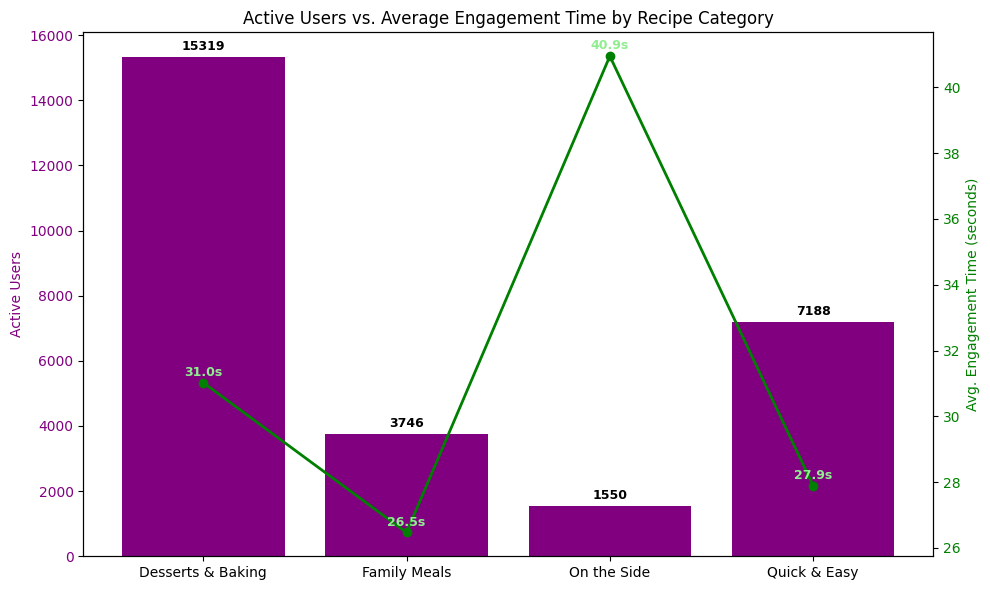

In [8]:
category_summary = recipes_data[recipes_data['Recipe Category'] != 'Other'].groupby('Recipe Category').agg({
    'Views': 'sum',
    'Active users': 'sum',
    'Views per active user': 'mean',
    'Average engagement time per active user': 'mean',
    'Event count': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart - purple
bars = ax1.bar(
    category_summary['Recipe Category'],
    category_summary['Active users'],
    color='purple',
    label='Active Users'
)
ax1.set_ylabel('Active Users', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', fontsize=9, fontweight='bold')

# Line chart - green
ax2 = ax1.twinx()
line = ax2.plot(
    category_summary['Recipe Category'],
    category_summary['Average engagement time per active user'],
    color='green', marker='o', linewidth=2, label='Avg. Engagement Time (s)'
)
ax2.set_ylabel('Avg. Engagement Time (seconds)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

for i, value in enumerate(category_summary['Average engagement time per active user']):
    ax2.annotate(f'{round(value, 1)}s', xy=(i, value),
                 xytext=(0, 5), textcoords="offset points", ha='center', fontsize=9, color='lightgreen', fontweight='bold')

plt.title('Active Users vs. Average Engagement Time by Recipe Category')
plt.tight_layout()
plt.show()


In [26]:
# Step 1: Rank by Active Users within each recipe category
rank_by_active_users = recipes_data.groupby(['Recipe Category', 'Page path and screen class']).agg({
    'Active users': 'sum',
    'Average engagement time per active user': 'mean'
}).reset_index()

# Sort by Recipe Category & Active Users DESC
rank_by_active_users = rank_by_active_users.sort_values(['Recipe Category', 'Active users'], ascending=[True, False])

# Step 2: Extract Top 2 pages for each category
top_2_per_category = rank_by_active_users.groupby('Recipe Category').head(2)

# Step 3: Display the final table
print("Top 2 Pages by Active Users (per category):")
display(top_2_per_category)


Top 2 Pages by Active Users (per category):


,Recipe Category,Page path and screen class,Active users,Average engagement time per active user
27,Desserts & Baking,/recipes/courgette-chocolate-chip-cookies-with...,6824,14.764801
1,Desserts & Baking,/recipes/apple-oat-muffins,1458,9.558985
80,Family Meals,/recipes/kefir-marinated-chicken-cashew-nut-curry,3360,15.889583
86,Family Meals,/recipes/thai-style-green-prawn-curry,159,39.591195
91,On the Side,/recipes/festive-hasselbacks-with-herby-yogurt...,974,22.738193
107,On the Side,/recipes/sizzling-chilli-greek-recipe-yogurt-dip,272,53.051471
119,Other,/recipes,10373,86.347826
228,Other,/recipes/gingerbread-granola,5376,13.579799
452,Quick & Easy,/recipes/naan-flatbread,4777,16.873561
451,Quick & Easy,/recipes/lemon-and-blueberry-and-chilli-cheese...,1664,40.228966


# **Blog Analysis**

In [9]:
# Step 1: Filter for Blog Pages based on URL structure
blog_data = data[data['Page path and screen class'].str.contains('/blog', case=False, na=False)]

# Step 2: Quick check on filtered data
print("Total blog pages:", blog_data.shape[0])
display(blog_data[['Page path and screen class']].head(10))

# Step 3: Display full blog data with all metrics
display(blog_data)



Total blog pages: 211


,Page path and screen class
33,/blog/think-you-know-yeokens
34,/blog
48,/blog/kefir-gut-health
50,/blog/celebrating-30-years-of-yeo-valley-organic
52,/blog/whats-so-good-about-kefir
57,/blog/micro-moo-ery
64,/blog/soil-its-a-wonderful-thing
68,/blog/does-yeo-valley-use-feed-additives
72,/blog/veggie-recipes-this-autumn
82,/blog/yeo-valley-organic-garden-september-spec...


,Page path and screen class,Views,Active users,Views per active user,Average engagement time per active user,Event count,Key events,Total revenue,Content Group
33,/blog/think-you-know-yeokens,8107,5852,1.385338,19.283322,17639,0,0,Other
34,/blog,7718,3865,1.996895,60.041138,9167,0,0,Other
48,/blog/kefir-gut-health,4274,2504,1.706869,24.239217,9754,0,0,Other
50,/blog/celebrating-30-years-of-yeo-valley-organic,3917,2728,1.435850,12.114736,8928,0,0,Other
52,/blog/whats-so-good-about-kefir,3777,2199,1.717599,36.696680,8414,0,0,Other
...,...,...,...,...,...,...,...,...,...
10285,/blog/whats-on-this-organic-september-at-yeo,1,1,1.000000,17.000000,4,0,0,Other
10286,/blog/www.yeovalley.co.uk/blog,1,1,1.000000,0.000000,1,0,0,Other
10287,/blog/yogurt-storage-tips (article dated 27 Ap...,1,1,1.000000,4.000000,3,0,0,Other
10288,/blogs/kefir-gut-healthwww.yeovalley.co.uk/blo...,1,1,1.000000,0.000000,3,0,0,Other


In [31]:
# Rank blog pages by Active Users
top_blogs = blog_data.groupby('Page path and screen class').agg({
    'Active users': 'sum',
    'Average engagement time per active user': 'mean'
}).reset_index()

# Sort by Active Users DESC and pick top 10
top_blogs = top_blogs.sort_values(by='Active users', ascending=False).head(10)

# Display top 10 blog pages
print("Top 10 Blog Pages by Active Users:")
display(top_blogs)


Top 10 Blog Pages by Active Users:


,Page path and screen class,Active users,Average engagement time per active user
162,/blog/think-you-know-yeokens,5852,19.283322
0,/blog,3865,60.041138
31,/blog/celebrating-30-years-of-yeo-valley-organic,2728,12.114736
94,/blog/kefir-gut-health,2504,24.239217
105,/blog/micro-moo-ery,2372,18.359612
187,/blog/whats-so-good-about-kefir,2199,36.696680
172,/blog/veggie-recipes-this-autumn,1752,33.515982
144,/blog/soil-its-a-wonderful-thing,1733,10.979227
45,/blog/does-yeo-valley-use-feed-additives,1671,20.728306
201,/blog/yeo-valley-organic-garden-september-spec...,1225,38.497143


In [10]:
def categorize_blog(url):
    url = url.lower()
    if 'news' in url or 'announcement' in url:
        return 'News'
    elif 'health' in url or 'gut' in url or 'wellness' in url:
        return 'Health'
    elif 'nature' in url or 'soil' in url or 'environment' in url or 'sustainability' in url:
        return 'Nature'
    elif 'kids' in url or 'little-ones' in url or 'family' in url:
        return 'Little Ones'
    elif 'tips' in url or 'tricks' in url or 'how-to' in url or 'storage' in url:
        return 'Tips & Tricks'
    elif 'valley' in url or 'yeokens' in url or 'community' in url or 'organic' in url:
        return 'In the Valley'
    else:
        return 'Other'

# Step 4: Categorize Blogs into content groups
blog_data.loc[:, 'Blog Category'] = blog_data['Page path and screen class'].apply(categorize_blog)

# Step 5: Check results
display(blog_data[['Page path and screen class', 'Blog Category']])


<ipython-input-10-9c3fff0dfddb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_data.loc[:, 'Blog Category'] = blog_data['Page path and screen class'].apply(categorize_blog)


,Page path and screen class,Blog Category
33,/blog/think-you-know-yeokens,In the Valley
34,/blog,Other
48,/blog/kefir-gut-health,Health
50,/blog/celebrating-30-years-of-yeo-valley-organic,In the Valley
52,/blog/whats-so-good-about-kefir,Other
...,...,...
10285,/blog/whats-on-this-organic-september-at-yeo,In the Valley
10286,/blog/www.yeovalley.co.uk/blog,In the Valley
10287,/blog/yogurt-storage-tips (article dated 27 Ap...,Tips & Tricks
10288,/blogs/kefir-gut-healthwww.yeovalley.co.uk/blo...,Health


In [11]:
# Step 1: Remove 'Other' and aggregate metrics
blog_summary = blog_data[blog_data['Blog Category'] != 'Other'].groupby('Blog Category').agg({
    'Views': 'sum',
    'Active users': 'sum',
    'Views per active user': 'mean',
    'Average engagement time per active user': 'mean',
    'Event count': 'sum'
}).reset_index()

# Step 2: Sort by Active Users
blog_summary = blog_summary.sort_values(by='Active users', ascending=False)

# Step 3: Display summary table
from IPython.display import display
display(blog_summary)



,Blog Category,Views,Active users,Views per active user,Average engagement time per active user,Event count
1,In the Valley,20685,14488,1.400078,32.928946,44426
0,Health,4601,2747,1.296642,26.855744,10375
3,Nature,3346,2231,1.467603,24.714796,7348
4,Tips & Tricks,1326,930,1.379331,36.753073,2358
2,Little Ones,7,5,1.400000,35.400000,12


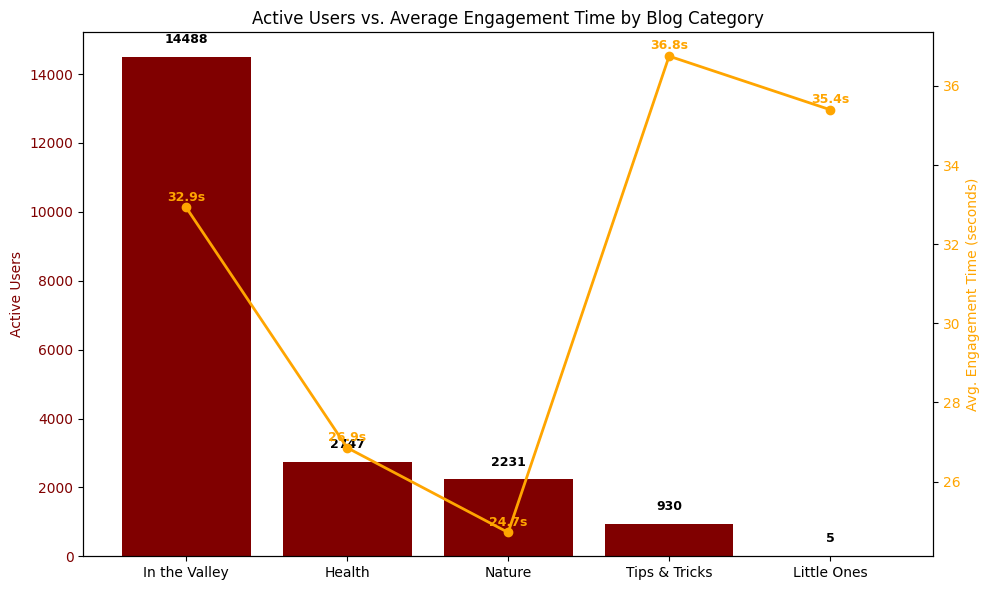

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Chart (Maroon)
bars = ax1.bar(
    blog_summary['Blog Category'],
    blog_summary['Active users'],
    color='#800000',  # Maroon
    label='Active Users'
)
ax1.set_ylabel('Active Users', color='#800000')
ax1.tick_params(axis='y', labelcolor='#800000')

# Adjust label positions (slightly higher offset)
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 10), textcoords="offset points", ha='center', fontsize=9, fontweight='bold')

# Line Chart (Orange)
ax2 = ax1.twinx()
line = ax2.plot(
    blog_summary['Blog Category'],
    blog_summary['Average engagement time per active user'],
    color='orange', marker='o', linewidth=2, label='Avg. Engagement Time (s)'
)
ax2.set_ylabel('Avg. Engagement Time (seconds)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adjust line label positions
for i, value in enumerate(blog_summary['Average engagement time per active user']):
    ax2.annotate(f'{round(value, 1)}s', xy=(i, value),
                 xytext=(0, 5), textcoords="offset points", ha='center', fontsize=9, color='orange', fontweight='bold')

plt.title('Active Users vs. Average Engagement Time by Blog Category')
plt.tight_layout()
plt.show()


In [32]:
# Step: Rank blog pages within each category
top_blog_pages = blog_data[blog_data['Blog Category'] != 'Other'].groupby(['Blog Category', 'Page path and screen class']).agg({
    'Active users': 'sum',
    'Average engagement time per active user': 'mean'
}).reset_index()

# Sort by Active Users DESC within each category
top_blog_pages = top_blog_pages.sort_values(['Blog Category', 'Active users'], ascending=[True, False])

# Keep only top 2 per category
top_2_blog_pages = top_blog_pages.groupby('Blog Category').head(2).reset_index(drop=True)

# Display result
print("Top 2 Blog Pages per Category by Active Users:")
display(top_2_blog_pages)


Top 2 Blog Pages per Category by Active Users:


,Blog Category,Page path and screen class,Active users,Average engagement time per active user
0,Health,/blog/kefir-gut-health,2504,24.239217
1,Health,/blog/a-healthy-start,234,44.683761
2,In the Valley,/blog/think-you-know-yeokens,5852,19.283322
3,In the Valley,/blog/celebrating-30-years-of-yeo-valley-organic,2728,12.114736
4,Little Ones,/blog/5-top-tips-for-family-camping,5,35.400000
5,Nature,/blog/soil-its-a-wonderful-thing,1733,10.979227
6,Nature,/blog/plant-your-pants-update-spoiler-the-soil...,257,7.490272
7,Tips & Tricks,/blog/how-to-fight-food-waste-in-your-fridge,360,60.641667
8,Tips & Tricks,/blog/yogurt-storage-tips,167,53.502994
